# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import sleep
import json
import openweathermapy as ow
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
weather=[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)


53

In [4]:
#created dataframe 
weather_df = pd.DataFrame({"City": cities})
weather_df.head()


,City
0,bridlington
1,lebedyn
2,belushya guba
3,saskylakh
4,salalah


In [5]:
#add columns
weather_df["Country"] = ""
weather_df["Temperature (F)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Wind Speed (mph)"] = ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""

In [6]:
weather_df.head()

,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
0,bridlington,,,,,,,
1,lebedyn,,,,,,,
2,belushya guba,,,,,,,
3,saskylakh,,,,,,,
4,salalah,,,,,,,


In [7]:
api_key = "6531fb771bd4c6120244bdacb4b0a890"

In [8]:

row_count = 0

for index, row in weather_df.iterrows():
    
    query_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["City"], api_key)
    response = requests.get(query_url).json()
   
    
    try:
        
        print(f'Initializing: City {row_count} {response["name"]}, {response["sys"]["country"]}.')
        print(query_url)
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        row_count = row_count + 1
        
        
        weather_df.set_value(index, "City", response["name"])
        weather_df.set_value(index, "Country", response["sys"]["country"])
        weather_df.set_value(index, "Temperature (F)", response["main"]["temp"])
        weather_df.set_value(index, "Humidity (%)", response["main"]["humidity"])
        weather_df.set_value(index, "Cloudiness (%)", response["clouds"]["all"])
        weather_df.set_value(index, "Wind Speed (mph)", response["wind"]["speed"])
        weather_df.set_value(index, "Latitude", response["coord"]["lat"])
        weather_df.set_value(index, "Longitude", response["coord"]["lon"])
        
      
        
    except:
        
        print("Missing field/result... skipping.")
        
    #while row_count % 5 == 0:
            #time.sleep(2)
    #row_count        
print("retrieval complete")
        

Initializing: City 0 Bridlington, GB.
http://api.openweathermap.org/data/2.5/weather?q=bridlington&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


C:\Users\mrpam\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\mrpam\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\mrpam\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\mrpam\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\mrpam\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\mrpam\Anaconda3\lib\s

Initializing: City 1 Lebedyn, UA.
http://api.openweathermap.org/data/2.5/weather?q=lebedyn&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Missing field/result... skipping.
Initializing: City 2 Saskylakh, RU.
http://api.openweathermap.org/data/2.5/weather?q=saskylakh&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initializing: City 3 Salalah, OM.
http://api.openweathermap.org/data/2.5/weather?q=salalah&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initializing: City 4 Kodiak, US.
http://api.openweathermap.org/data/2.5/weather?q=kodiak&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initializing: City 5 Hithadhoo, MV.
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initializing: City 42 Kushima, JP.
http://api.openweathermap.org/data/2.5/weather?q=kushima&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initializing: City 43 Mount Isa, AU.
http://api.openweathermap.org/data/2.5/weather?q=mount isa&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initializing: City 44 Tuktoyaktuk, CA.
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initializing: City 45 Hermanus, ZA.
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initializing: City 46 Banff, CA.
http://api.openweathermap.org/data/2.5/weather?q=banff&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initi

In [23]:
#visualize, check data 
weather_df.head()

,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
0,Bridlington,GB,67.23,68.0,75.0,23.04,54.08,-0.19
1,Lebedyn,UA,65.29,62.0,0.0,17.83,50.58,34.48
3,Saskylakh,RU,35.77,96.0,88.0,5.08,71.97,114.09
4,Salalah,OM,78.80,88.0,40.0,9.17,17.01,54.10
5,Kodiak,US,78.08,73.0,1.0,4.74,39.95,-94.76


In [24]:
#drop rows with missing values 
weather_df = weather_df.dropna(how='any')

In [25]:
#convert to graphable values 
weather_df['Temperature (F)'] = pd.to_numeric(weather_df['Temperature (F)'])
weather_df['Humidity (%)'] = pd.to_numeric(weather_df['Humidity (%)'])
weather_df['Cloudiness (%)'] = pd.to_numeric(weather_df['Cloudiness (%)'])
weather_df['Wind Speed (mph)'] = pd.to_numeric(weather_df['Wind Speed (mph)'])
weather_df['Latitude'] = pd.to_numeric(weather_df['Latitude'])
weather_df['Longitude'] = pd.to_numeric(weather_df['Longitude'])


In [26]:
weather_df.dtypes

City                 object
Country              object
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
Latitude            float64
Longitude           float64
dtype: object

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# Save the revised Data Frame as a csv
weather_df.to_csv(
    "../Resources/weatherpycitydata.csv", encoding="utf-8", index=False)

# Visualize
weather_df.head()

,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
0,Bridlington,GB,67.23,68.0,75.0,23.04,54.08,-0.19
1,Lebedyn,UA,65.29,62.0,0.0,17.83,50.58,34.48
3,Saskylakh,RU,35.77,96.0,88.0,5.08,71.97,114.09
4,Salalah,OM,78.80,88.0,40.0,9.17,17.01,54.10
5,Kodiak,US,78.08,73.0,1.0,4.74,39.95,-94.76


In [13]:
weather_df.describe()

,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
count,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000
mean,63.385510,78.428571,37.938776,8.390816,17.61551,4.664898
std,17.766778,19.259197,34.518961,5.767088,37.10339,100.879652
min,23.000000,19.000000,0.000000,1.610000,-54.81000,-161.760000
25%,54.140000,69.000000,1.000000,4.700000,-9.80000,-74.980000
50%,66.640000,81.000000,24.000000,6.870000,22.08000,18.420000
75%,78.080000,95.000000,75.000000,11.410000,47.66000,115.240000
max,90.670000,100.000000,92.000000,24.160000,73.51000,173.780000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

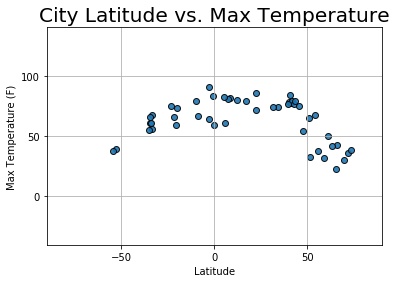

In [14]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], alpha=0.9, edgecolors='black', label="City")


plt.style.use('fivethirtyeight')
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-40, 140)
plt.xlim(-90, 90)


plt.savefig("../Images/Lat_Temp.png")
plt.show()

plt.show()

#### Latitude vs. Humidity Plot

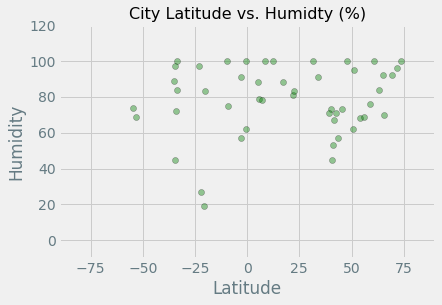

In [28]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=0.4, color="green", edgecolors='black', label="City")


plt.style.use('Solarize_Light2')
plt.title(f"City Latitude vs. Humidty (%)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-10, 120)
plt.xlim(-90, 90)


plt.savefig("../Images/Lat_Humid.png")


plt.show()

#### Latitude vs. Cloudiness Plot

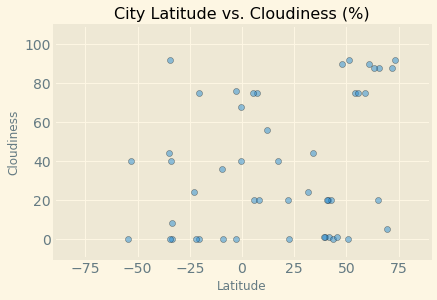

In [16]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=0.5, edgecolors='black', label="City")


plt.style.use('seaborn-dark-palette')
plt.title(f"City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-10, 110)
plt.xlim(-90, 90)


plt.savefig("../Images/Lat_Cloud.png")


plt.show()

#### Latitude vs. Wind Speed Plot

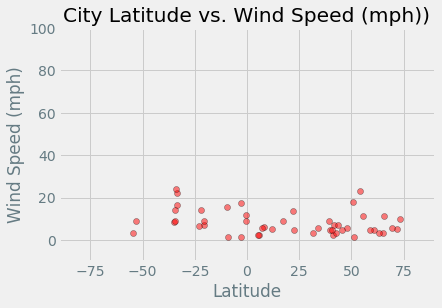

In [19]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], color="red", alpha=0.5, edgecolors='black', label="City")


plt.style.use('fivethirtyeight')
plt.title(f"City Latitude vs. Wind Speed (mph))")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-10, 100)
plt.xlim(-90, 90)


plt.savefig("../Images/Lat_Wind.png")


plt.show()